In [1]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Metody Numeryczne

## Interpolacja i aproksymacja wielomianowa


### dr hab. inż. Jerzy Baranowski, Prof.AGH


# Aproksymacja funkcji

Zadanie aproksymacji polega na poszukiwaniu funkcji $\tilde{f}$

$$
\tilde{f}(x)\approx f(x), \forall x\in \Omega
$$

która, z jakiegoś powodu będzie wygodniejsza w obsłudze i w jakimś sensie przybliża funkcję $f$. 


# Zastosowania

- Aproksymacja funkcji
- Obróbka danych pomiarowych
- Uzyskiwanie wartości pośrednich
- Grafika komputerowa


# Aproksymacja wielomianowa

Aproksymacja wielomianowa, to sposób taka metoda aproksymacji, w której zakładamy, że funkcja przybliżająca ma postać wielomianu

$$
\begin{aligned}
\tilde{f}(x)={}&p(x)\\
p(x)={}&a_n x^n+a_{n-1}x^{n-1}+\ldots+a_2 x^2 +a_1 x+a_0
\end{aligned}
$$

# Założenia

- Mówimy o aproksymacji funkcji na przedziale $[-1,1]$
- Do porównywania funkcji będziemy wykorzystywać normę supremum

$$
\Vert f \Vert = \sup_{x\in[-1,1]} |f(x)|
$$


# Twierdzenie aproksymacyjne Weierstrass’a
Niech $f$ będzie funkcją ciągłą na przedziale $[−1,1]$, i niech $\varepsilon$ > 0 będzie pewną stałą. Istnieje wielomian $p$ taki, że

$$
\Vert f-p\Vert<\varepsilon
$$


# Poszukiwanie wielomianu aproksymacyjnego
- Interpolacja
- Rzutowanie
- Optymalizacja


# Interpolacja
Zadanie interpolacji polega na znalezieniu dla zestawu punktów (węzłów)

$$
x_0, x_1, x_2, ..., x_n
$$

$$
y_0, y_1, y_2,..., y_n
$$
Takiej funkcji, że
		$$f(x_i)=y_i, \forall0 \le i\le n$$

      

# Interpolacja wielomianowa 
- Problem znalezienia całej funkcji sprowadza się więc do znalezienia zestawu współczynników wielomianu $p$.
- Wielomian ma stopień $n$, gdy mamy $n+1$ węzłów
- Jak go wyznaczyć?


# Jednoznaczność
- Czy jest inny wielomian $q(x)$ stopnia $n$, ktĂłry interpoluje dane tak samo dobrze jak $p(x)$?
$$r(x)=p(x)-q(x)$$
- $r(x)$ jest wielomianem
- $r(x)$ jest stopnia co najwyżej $n$
- We wszystkich punktach zachodzi
$$r(x_i)=p(x_i)-q(x_i)=y_i-y_i=0$$


# Jednoznaczność
- Skoro wielomian $r(x)$ zeruje się we wszystkich tych punktach musi mieć on postać

$$r(x)=\underbrace{(x-x_0)(x-x_1)\dots(x-x_n)}_{n+1\ \mathsf{czynników}}$$

- Ponieważ ma być stopnia $n$ lub niższego, jest to niemożliwe więc

- $$r(x)=0\Rightarrow q(x)\equiv p(x)$$



# Wzór Lagrange’a

- Klasyczny wzór na określenie wielomianu interpolacyjnego.
- Najbardziej uniwersalny
- Potrzebny do wyprowadzania innych wzorów
- Pojęciowo najprostszy


# Wzór Lagrange’a

<div class='left' style='float:left;width:48%'>
Chcemy przedstawić wielomian jako sumę innych prostszych wielomianów
$$L(x)=\sum_{j=0}^{n}y_jl_j(x)$$
$$l_i(x)=\left\{ \begin{array}{ll}
1 & \mathrm{dla}\  x=x_i\\
0 &  \mathrm{dla}\ x=x_k,\ k\neq i\\
\end{array} \right.$$
</div>    
<div class='right' style='float:right;width:48%'>

![](img/1.png)


    
</div>






# Funkcje bazowe Lagrange'a

$$
\begin{aligned}
l_j(x)={}&\prod_{0\le m\le n\hspace{1mm} m\neq j} \frac{x-x_m}{x_j-x_m}=\\
={}&\frac{(x-x_0)}{(x_j-x_0)}\dots \frac{(x-x_{j-1})}{(x_j-x_{j-1})}\frac{(x-x_{j+1})}{(x_j-x_{j+1})}\dots\frac{(x-x_n)}{(x_j-x_n)}
\end{aligned}
$$

# Funkcje bazowe Lagrange'a

$$l_{j\neq i}(x_i)=\prod_{m\neq j}\frac{x_i-x_m}{x_j-x_m} =\frac{(x_i-x_0)}{(x_j-x_0)}\dots\frac{(x_i-x_i)}{(x_j-x_i)}\dots \frac{(x_i-x_k)}{(x_j-x_k)}=0$$


$$l_i(x_i)=\prod_{m\neq i}\frac{x_i-x_m}{x_i-x_m}=1$$


# Przykład


In [111]:
import matplotlib.pyplot as plt
import numpy as np
x_i=np.array([-1.5, -0.75, 0, 0.75, 1.5])
y_i=np.array([-14.1014,-0.931596,0,0.931596,14.1014])

lag_base= lambda i,x : np.prod(x-np.delete(x_i,i))/np.prod(x_i[i]-np.delete(x_i,i))
Y=[]
X=np.linspace(-1.499,1.499,100)
for x in np.nditer(X):
    L=np.array([lag_base(0,x),lag_base(1,x),lag_base(2,x),lag_base(3,x),lag_base( 4,x)])
    Y.append(y_i@L.transpose())
Y=np.array(Y)

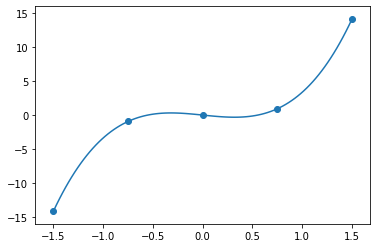

In [112]:
plt.plot(X,Y)
plt.scatter(x_i,y_i)

# Wada wzoru Lagrange'a

Złożoność obliczeniowa wyliczenia wartości wielomianu w punkcie $x$ -  $O(n^2)$

$$
L(x)=\sum_{j=0}^n y_j l_j(x)
$$

## Interpolacja barycentryczna

Modyfikacja interpolacji Lagrange’a

$$l(x)=(x-x_0)(x-x_1)\ldots(x-x_n)$$

Wagi barycentryczne:
$$
w_j=\frac{1}{\prod_{k\neq j} (x_j-x_k)},\ j=0,\ldots,\ n
$$

Funkcje bazowe
$$
l_j(x)=l(x)\frac{w_j}{x-x_j}
$$

# Pierwsza forma wzoru barycentrycznego


$$L(x)=l(x)\sum_{j=0}^{n}y_j\frac{w_j}{x-x_j}$$

Złożoność O(n)



# Usprawnienie
Interpolacja funkcji stałej równej 1
$$
1=\sum_{j=0}^n  l_j(x)=l(x)\sum_{j=0}^{n}\frac{w_j}{x-x_j}
$$
Podzielenie funkcji przez 1

$$
L(x)=\frac{L(x)}{1}=\frac{l(x)\sum_{j=0}^{n}y_j\frac{w_j}{x-x_j}}{l(x)\sum_{j=0}^{n}\frac{w_j}{x-x_j}}
$$


# Druga forma wzoru barycentrycznego

$$
L(x)=\frac{\sum_{j=0}^{n}y_j\frac{w_j}{x-x_j}}{\sum_{j=0}^{n}\frac{w_j}{x-x_j}}
$$



# Przykład


In [4]:
x_i=np.array([-1.5, -0.75, 0, 0.75, 1.5])
y_i=np.array([-14.1014,-0.931596,0,0.931596,14.1014])

bar_w= lambda i : 1/np.prod(x_i[i]-np.delete(x_i,i))
w_i=np.array([bar_w(0),bar_w(1),bar_w(2),bar_w(3),bar_w(4)])

Y=[]
X=np.linspace(-1.499,1.499,100)
for x in np.nditer(X):
    # pierwsza forma
    #Y.append(np.prod(x-x_i)*y_i*w_i@(1/(x-x_i))) 
    #druga forma
    L=w_i/(x-x_i)
    Y.append(y_i@L/sum(L))
    
Y=np.array(Y)

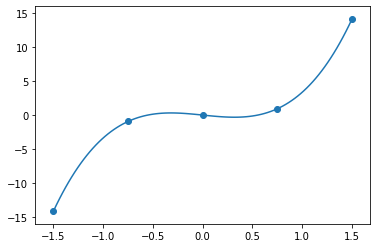

In [5]:
plt.plot(X,Y)
plt.scatter(x_i,y_i)

# Węzły interpolacji
- Jak dobrać węzły interpolacji?
- Węzły równoodległe:
- Dla przedziału $[-1,1]$
$$
x_i=-1+\frac{2 i}{n}
$$

# Wagi barycentryczne
Zależą tylko od węzłów!

Np. Dla węzłów równoodległych na $[-1,1]$

$$
w_j=\frac{(-1)^{n-j}}{h^n n!}{n \choose j}
$$

W drugiej postaci uproszczenie

$$
w_j=(-1)^{j}{n \choose j}
$$

# Efekt Rungego
W przypadku węzłów równooodległych może wystąpić tzw. Efekt Rungego, który można zilustrować dla funkcji
$$
f(x)=\frac{1}{1+25 x^2}
$$

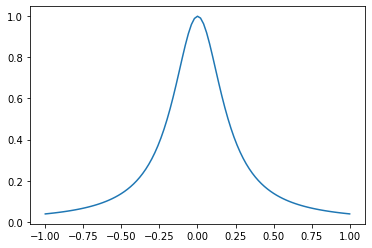

In [191]:
runge = lambda x:1/(1+25*(x-1e-3)**2)

plt.plot(X,runge(X))

In [192]:
N=10
X=np.linspace(-1+1e-5,1-1e-5,101)
x_i=np.linspace(-1,1,N)
y_i=runge(x_i)
w_i=[bar_w(i) for i in range(0,np.size(x_i))]

def barycentric_interpolate(x_i,y_i,w_i,X):
    Y=[]
    for x in np.nditer(X):
        if x in x_i:
            #omijamy dzielenie przez 0
            Y.append(y_i[np.where(x_i==x)[0]])
        else:
            #wzór w drugiej formie
            L=w_i/(x-x_i)
            Y.append(y_i@L/sum(L)) 
    return np.array(Y)

Y=barycentric_interpolate(x_i,y_i,w_i,X)

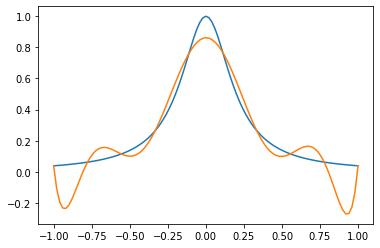

In [193]:
plt.plot(X,runge(X))
plt.plot(X,Y)

# Dlaczego tak jest?
Wagi barycentryczne dla węzłów równoodległych są co do wartości bardzo duże na środku przedziału

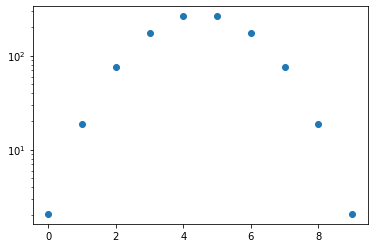

In [9]:
fig=plt.figure()
ax=plt.gca()
ax.scatter(range(0,N),np.abs(w_i))
ax.set_yscale('log')


In [10]:

L_X=[]
for x in np.nditer(X):
    L_X.append(np.prod(x-x_i))

# Funkcje bazowe

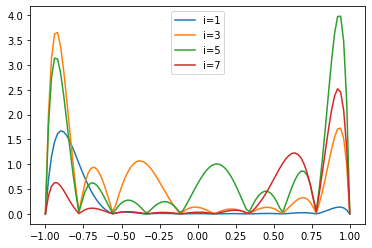

In [11]:
fig=plt.figure()
ax=plt.gca()
for i in range(1,N-1,2):
    ax.plot(X,np.abs((L_X/(X-x_i[i]))*w_i[i]),label='i='+str(i))
ax.legend()

# Węzły czebyszewa
Węzły Czebyszewa to części rzeczywiste punktów rozmieszczonych równomiernie na okręgu jednostkowym
na płaszczyźnie zespolonej. 
$$
\begin{aligned}
x_j={}&\mathrm{Re} z_j=\frac{1}{2}(z_j+z_j^{-1}),\quad 0\leq j\leq n\\
={}&\cos(j\pi/n)
\end{aligned}
$$

#  Wagi barycentryczne dla węzłów Czebyszewa
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

In [189]:
N=12
x_i=np.array([np.cos(i*np.pi/N) for i in range(0,N+1)])
y_i=runge(x_i)
w_i=[np.power(-1,i) for i in range(N+1)]
w_i[0]=0.5
w_i[N]=0.5
Y=barycentric_interpolate(x_i,y_i,w_i,X)

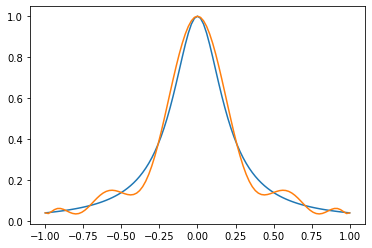

In [190]:
plt.plot(X,runge(X))
plt.plot(X,Y)


# Funkcje bazowe

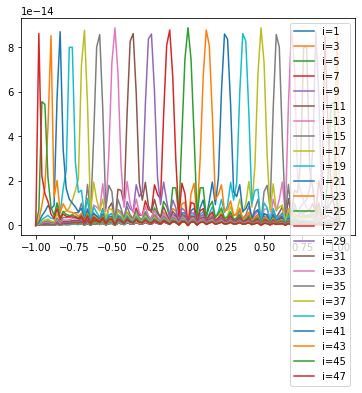

In [14]:

L_X=[]
for x in np.nditer(X):
    L_X.append(np.prod(x-x_i))
fig=plt.figure()
ax=plt.gca()
for i in range(1,N-1,2):
    ax.plot(X,np.abs((L_X/(X-x_i[i]))*w_i[i]),label='i='+str(i))
ax.legend()

# Czy węzły Czebyszewa są jedyne dobre?
Interpolacja się dobrze zachowuje, jeżeli węzły zagęszczają się przy brzegach przedziału, konkretnie jeżeli rozłożenie węzłów interpolacji układa się wg. wzoru
$$
\frac{1}{\pi\sqrt{1-x^2}}
$$
Punktami spełniającymi to wymaganie są m.in. węzły Legendre’a

(0, 2)

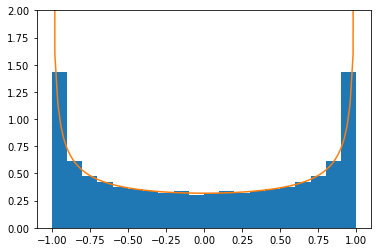

In [15]:
N=500
x_i=np.array([np.cos(i*np.pi/N) for i in range(0,N+1)])
plt.hist(x_i,bins=20,density='True')
YY=1/np.sqrt(1-X**2)/np.pi
plt.plot(X,YY)
plt.ylim(0,2)

#  Zbieżność interpolacji Czebyszewa dla funkcji różniczkowalnych

Dla całkowitej liczby $v ≥ 0$, niech $f$ i jej pochodne do stopnia $(v−1)$ będą absolutnie ciągłe na przedziale $[−1,1]$ i niech pochdna stopnia $v$ ma skończone wachanie $V$. Wtedy dla wszystkich $n>v$ błąd interpolacji spełnia

$$
\Vert f-p_n\Vert \leq \frac{4V}{\pi v(n-v)^v}
$$

gdzie $V=\int_{-1}^1|f'(x)|\mathrm{d} x$

# Przykład
$f(x)=|\sin{5 x}|^3$

In [16]:
funkcja = lambda x:np.abs(np.sin(5*x))**3

N=1000
x_i=np.array([np.cos(i*np.pi/N) for i in range(0,N+1)])
y_i=funkcja(x_i)
w_i=[np.power(-1,i) for i in range(N+1)]
w_i[0]=0.5
w_i[N]=0.5
Y=barycentric_interpolate(x_i,y_i,w_i,X)

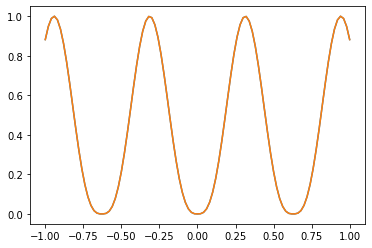

In [17]:
plt.plot(X,funkcja(X))
plt.plot(X,Y)

In [178]:
wynik=[]
I=[]
Y_org=funkcja(X)
for k in range(2,1000,10):
    x_i=np.array([np.cos(i*np.pi/k) for i in range(0,k+1)])
    y_i=funkcja(x_i)
    w_i=[np.power(-1,i) for i in range(k+1)]
    w_i[0]=0.5
    w_i[k]=0.5
    Y=barycentric_interpolate(x_i,y_i,w_i,X)
    wynik.append(np.abs(np.max((Y-Y_org))))
    I.append(k)


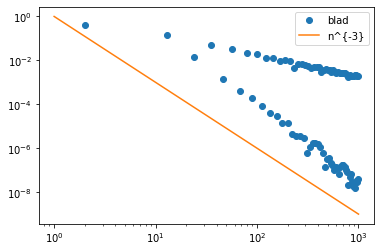

In [177]:
fig=plt.figure()
ax=plt.gca()
ax.loglog(I,wynik,'o',label='blad')
ax.loglog([1,1e3],[1,1e-9],label='n^{-3}')
ax.legend()


# Funkcje analityczne

Teoria:
- Funkcja analityczna – nieskończenie różniczkowalna funkcja w pewnym zbiorze (również uwzględniając liczby zespolone)
- Elipsa Bernsteina - $E_\rho$ – elipsa na płaszczyźnie zespolonej z ogniskami w punktach $(-1, j0)$, $(1, j0)$
- Szerokość elipsy Bernsteina określamy jako $2a$, wysokość jako $2b$. 
- parametr $\rho=a+b$ charakteryzuje elipsę


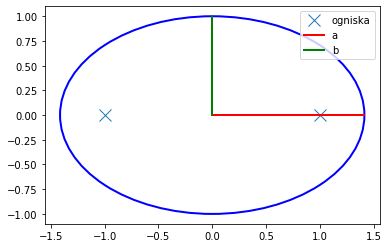

In [134]:
from matplotlib.patches import Ellipse
b=1
c=1
a=np.sqrt(1+b**2)
elipsa=plt.figure()
ax=plt.gca()
ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='b', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x',label='ogniska',markersize=12)
ax.plot([0,a],[0,0],'r',lw=2,label='a')
ax.plot([0,0],[0,b],'g',lw=2,label='b')
ax.legend()


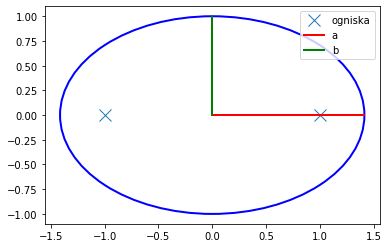

In [136]:
elipsa

# Zbieżność interpolacji Czebyszewa dla funkcji analitycznych

Niech funkcja analityczna w przedziale $[−1, 1]$ będzie analitycznie przedłużalna do otwartej elipsy Bernsteina, w której $|f(x)| \leq M$ dla pewnego $M$. Wtedy interpolacja Czebyszewa spełnia oszacowanie


$$
\Vert f-p_n\Vert \leq \frac{4M\rho^{-n}}{ \rho-1}
$$


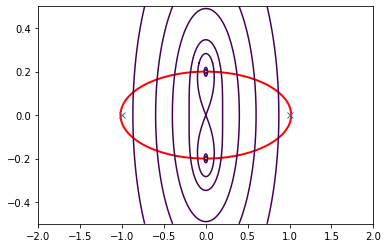

In [211]:
# generate data
x = np.linspace(-2,2,2001)
y = np.linspace(-.5,.5,2001)
X, Y = np.meshgrid(x, y)
Z = 1/np.abs((1+25*(X+1j*Y)**2))
#plt.autoscale()
elipsa_f_rungego=plt.figure()
ax=plt.gca()
ax.contour(X,Y,Z,[0.05,0.1,0.2,0.5,1,5,10,100,1000])

# c=sqrt(a^2-b^2)
b=0.2-1e-6
c=1
a=np.sqrt(1+b**2)

ellipse = Ellipse(xy=(0, 0), width=2*a, height=2*b, 
                        edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
ax.plot([-1,1],[0,0],'x')


# Przykład - funkcja Rungego

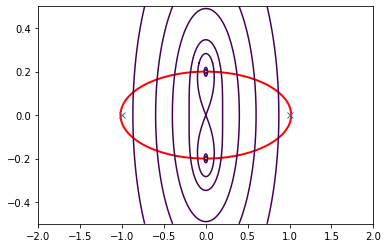

In [218]:
elipsa_f_rungego



In [213]:
rho=a+b
M=runge(1j*b)
print(rho,M)

1.2198027066028931 (0.34999896249976115+99.99927500088125j)


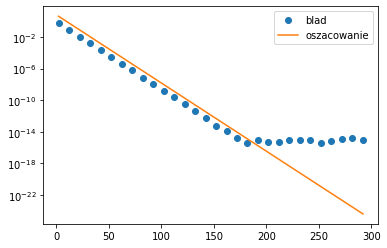

In [216]:
X=np.linspace(-1+1e-5,1-1e-5,101)
wynik=[]
I=[]
Y_org=runge(X)
for k in range(2,300,10):
    x_i=np.array([np.cos(i*np.pi/k) for i in range(0,k+1)])
    y_i=runge(x_i)
    w_i=[np.power(-1,i) for i in range(k+1)]
    w_i[0]=0.5
    w_i[k]=0.5
    Y=barycentric_interpolate(x_i,y_i,w_i,X)
    wynik.append(np.abs(np.max((Y-Y_org))))
    I.append(k)

runge_zbieznosc=plt.figure()
ax=plt.gca()
ax.semilogy(I,wynik,'o',label='blad')
oszacowanie=[4*np.real(M)*rho**(-x)/(rho-1) for x in I]
ax.semilogy(I,oszacowanie,label='oszacowanie')
ax.legend()

# Zbieżność

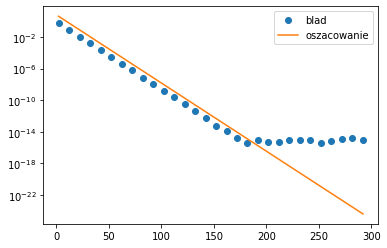

In [228]:
runge_zbieznosc

# Przykład funkcja całkowita


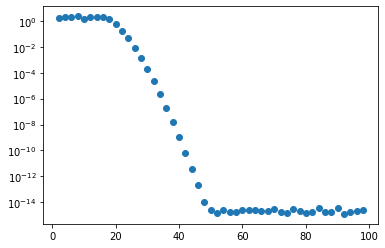

In [240]:
Y_org=np.sin(20*X)
wynik=[]
I=[]
for k in range(2,100,2):
    x_i=np.array([np.cos(i*np.pi/k) for i in range(0,k+1)])
    y_i=np.sin(20*x_i)
    w_i=[np.power(-1,i) for i in range(k+1)]
    w_i[0]=0.5
    w_i[k]=0.5
    Y=barycentric_interpolate(x_i,y_i,w_i,X)
    wynik.append(np.abs(np.max((Y-Y_org))))
    I.append(k)

cosinus_zbieznosc=plt.figure()
ax2=plt.gca()
ax2.semilogy(I,wynik,'o',label='blad')
ax.legend()

# Zbieżność

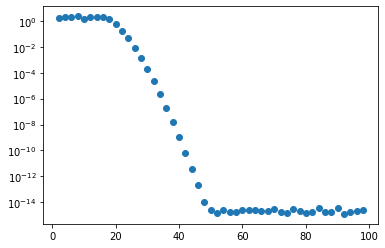

In [242]:
cosinus_zbieznosc

# Uwagi
- Jeżeli funkcja jest analityczna tylko w przedziale [-1,1] to oszacowanie nic nie daje.
- Dlaczego zachowanie funkcji na płaszczyźnie zespolonej wpływa na jej interpolację w liczbach rzeczywistych?
**Wielomian jest bardzo regularną funkcją zmiennej zespolonej – ciężko oczekiwać żeby był podobny do funkcji, która nie jest regularna**


# Interpolacja funkcji nieciągłych – efekt Gibbsa

Interpolacja funkcji nieciągłych wiąże się z nieuniknionym 
Błędem, którego podniesienie rzędu interpolacji 
nie zmniejszy 


In [286]:
gibbs=lambda x: np.sign(x)
X=np.linspace(-1+1e-5,1-1e-5,1001)
#X=np.linspace(-1e-2,1e-2,1001)



N=19
x_i=np.array([np.cos(i*np.pi/N) for i in range(0,N+1)])
y_i=gibbs(x_i)
w_i=[np.power(-1,i) for i in range(N+1)]
w_i[0]=0.5
w_i[N]=0.5
Y=barycentric_interpolate(x_i,y_i,w_i,X)


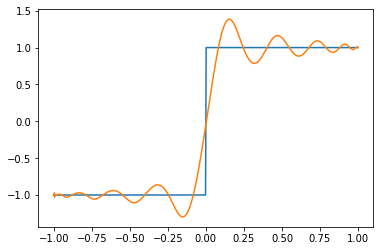

In [287]:
plt.plot(X,gibbs(X))
plt.plot(X,Y)